In [1]:
import os
os.chdir('..')

In [2]:
from src.dataPipeline import DataPipeline

dp = DataPipeline()
df = dp.runPipeline()

C:\FHNW_Programmiersachen\5_Sem\immo_challenge\src\dataPipeline.py:38: DtypeWarning: Columns (3,4,5,6,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,45,46,47,49,50,107,110,114,115,116,119,120,121,124,125,126,128,131,132) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data = pd.read_csv(filePath)
C:\FHNW_Programmiersachen\5_Sem\immo_challenge\src\dataPipeline.py:61: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ]].bfill(axis=1)['Space extracted']
C:\FHNW_Programmiersachen\5_Sem\immo_challenge\src\dataPipeline.py:66: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To o

In [3]:
df

,Floor,detail_responsive#surface_usable,Floor_space_merged,lat,lon,ForestDensityL,ForestDensityM,ForestDensityS,Latitude,Longitude,...,type_secondary-suite,type_semi-detached-house,type_single-room,type_stepped-apartment,type_stepped-house,type_studio,type_terrace-house,type_villa,provider_Immoscout24.ch,provider_homegate.ch
0,4.000000,175.807692,197.275039,47.417100,8.085600,0.511176,0.286451,0.090908,47.415927,8.085840,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,4.622425,175.807692,242.000000,47.419500,8.082700,0.511176,0.286451,0.090908,47.415927,8.085840,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,2.000000,175.807692,197.275039,47.403300,8.033000,0.163362,0.095877,0.001911,47.397416,8.043150,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.622425,175.807692,257.000000,47.415643,8.085423,0.511176,0.286451,0.090908,47.415927,8.085840,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.000000,175.807692,197.275039,47.403824,8.048288,0.333865,0.279276,0.145835,47.404870,8.052781,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20843,4.622425,175.807692,197.275039,47.158318,9.468165,0.495715,0.385885,0.097278,47.158311,9.468139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20844,4.622425,175.807692,197.275039,47.467488,9.052574,0.000000,0.000000,0.000000,47.467888,9.052650,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20845,4.622425,175.807692,197.275039,47.465266,9.041548,0.000000,0.000000,0.000000,47.463605,9.038485,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20846,4.622425,175.807692,197.275039,47.526504,8.927411,0.410843,0.151363,0.038351,47.526024,8.926627,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [52]:

def plot_regression_line(X_test, y_test, models, title):
    plt.scatter(X_test, y_test, color='gray')
    # Plot the regression line for mean coefficients and intercept
    plt.plot(X_test, np.mean([model.coef_ for model in models], axis=0) * X_test + np.mean([model.intercept_ for model in models]), color='red', linewidth=2)
    plt.title(f'{title} MAPE: {average_mape:.3f}%')
    plt.show()

# Residual Plot
def plot_residual(y_pred, y_test):
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
    plt.title('Residual Plot')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()

def plot_histogram_residual(y_pred, y_test):
    plt.hist(y_pred- y_test, bins=60)
    plt.title('Histogram of Residuals')
    plt.show()
    

# Einfache Lineare Regression mit Space extracted

In [42]:
y = df[['price_cleaned']]
X = df[['Space extracted']]

Durchschnittlicher MAPE über K-Folds: 64.16%
Mean Coefficients: [[7963.69958784]]
Mean Intercept: 48399.45968096137


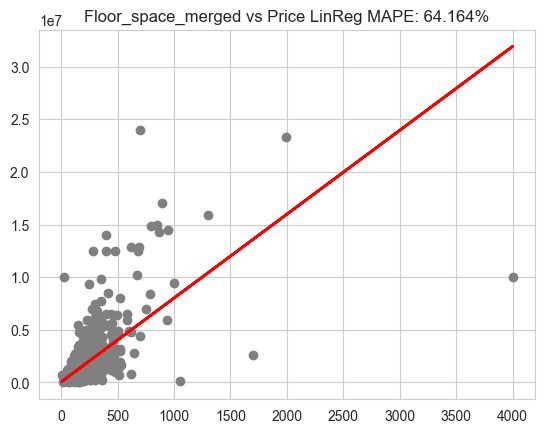

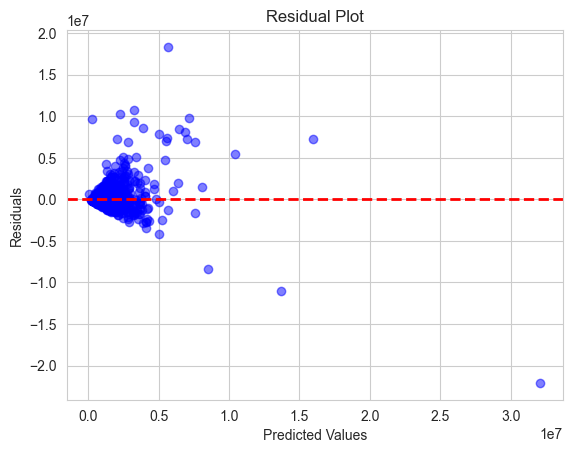

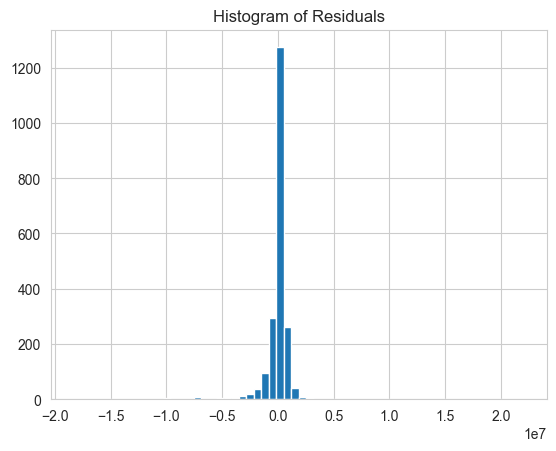

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, shuffle=True, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mape = mean_absolute_percentage_error(y_test, y_pred)


plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title(f'Space extracted vs Price LinReg MAPE: {mape:.3f}%')
plt.show()

In [44]:
import pandas as pd
import numpy as np

# Berechne die absoluten prozentualen Abweichungen
percentage_errors = np.abs((y_test - y_pred) / y_test) * 100 # In Prozent

# Konvertiere X_test, y_test, y_pred und percentage_errors in Arrays und flache sie ab
X_test_flat = X_test.values.flatten()
y_test_flat = y_test.values.flatten()
y_pred_flat = y_pred.flatten()
percentage_errors_flat = percentage_errors.values.flatten()  # Hier `.values` verwenden, um in ein Array zu konvertieren

# Erstelle ein DataFrame mit den abgeflachten Werten
results = pd.DataFrame({
    'X_test': X_test_flat,
    'y_test': y_test_flat,
    'y_pred': y_pred_flat,
    'percentage_error': percentage_errors_flat
})

# Sortiere nach dem prozentualen Fehler in absteigender Reihenfolge
results_sorted = results.sort_values(by='percentage_error', ascending=False)

# Zeige die obersten N Werte mit den größten Abweichungen (z.B. die obersten 5)
top_n = 12
top_errors = results_sorted.head(top_n)

# Ausgabe
print(top_errors)


          X_test   y_test        y_pred  percentage_error
6207   85.000000    790.0  6.841188e+05      86497.317843
3341  158.288527   1600.0  1.321236e+06      82477.248390
3146   75.000000   1100.0  5.971861e+05      54189.643849
4991   45.000000    745.0  3.363879e+05      45052.737786
511   158.288527   3500.0  1.321236e+06      37649.599264
5276  170.000000   4450.0  1.423047e+06      31878.584363
3781  119.000000   3650.0  9.796901e+05      26740.824335
2156  120.000000   5333.0  9.883834e+05      18433.346355
3058   19.000000    950.0  1.103628e+05      11517.137064
3621   82.000000  13480.0  6.580390e+05       4781.594899
2547  158.288527  44000.0  1.321236e+06       2902.809032
5502  230.000000  80000.0  1.944643e+06       2330.804220


Durchschnittlicher MAPE über K-Folds: 64.16%
Mean Coefficients: [[7963.69958784]]
Mean Intercept: 48399.45968096137


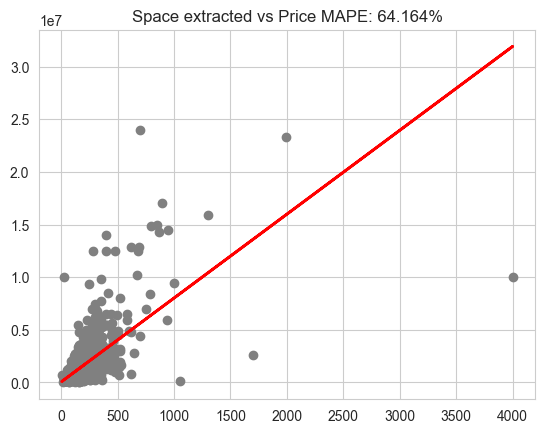

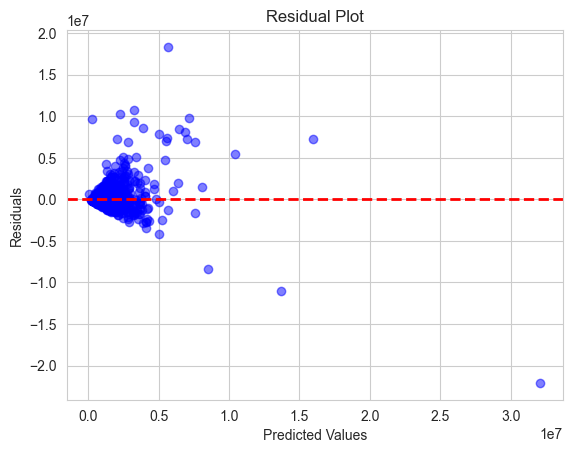

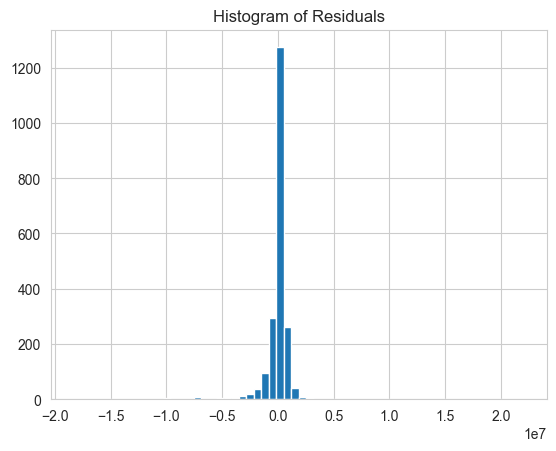

In [53]:
from sklearn.model_selection import KFold
import numpy as np

# Set up K-Fold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
mapes = []
models = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mapes.append(mape)
    models.append(model)

# Durchschnittlicher MAPE
average_mape = np.mean(mapes)
print(f'Durchschnittlicher MAPE über K-Folds: {average_mape:.2f}%')

print(f'Mean Coefficients: {np.mean([model.coef_ for model in models], axis=0)}')
print(f'Mean Intercept: {np.mean([model.intercept_ for model in models])}')

plot_regression_line(X_test, y_test, models, 'Space extracted vs Price')
plot_residual(y_pred, y_test)
plot_histogram_residual(y_pred, y_test)

# Einfache Lineare Regression mit Floor_space_merged

In [46]:
y = df[['price_cleaned']]
X = df[['Floor_space_merged']]

Durchschnittlicher MAPE über K-Folds: 65.07%
Mean Coefficients: [[4085.59162651]]
Mean Intercept: 502986.93352097145


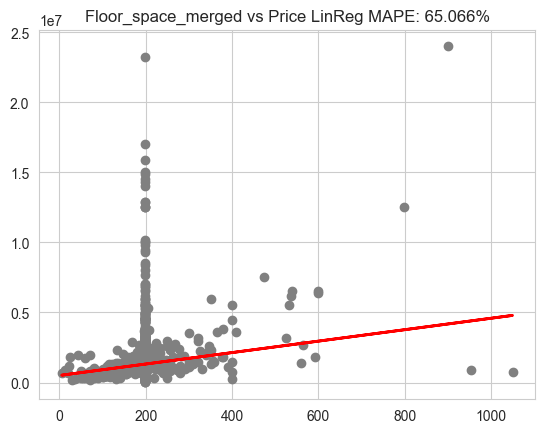

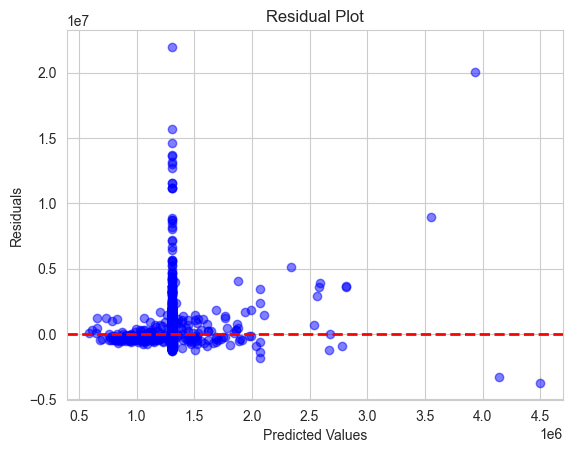

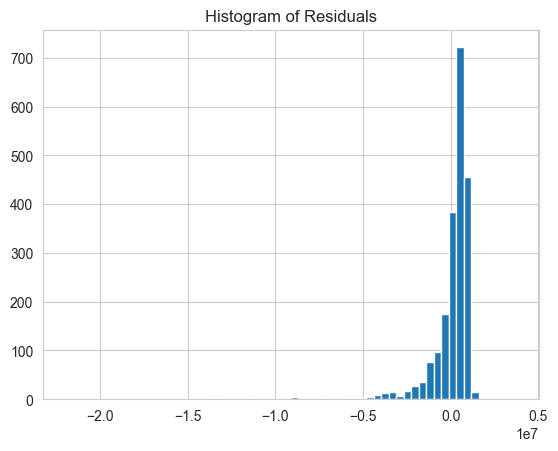

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=41)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mape = mean_absolute_percentage_error(y_test, y_pred)

plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title(f'Floor_space_merged vs Price LinReg MAPE: {mape:.3f}%')
plt.show()

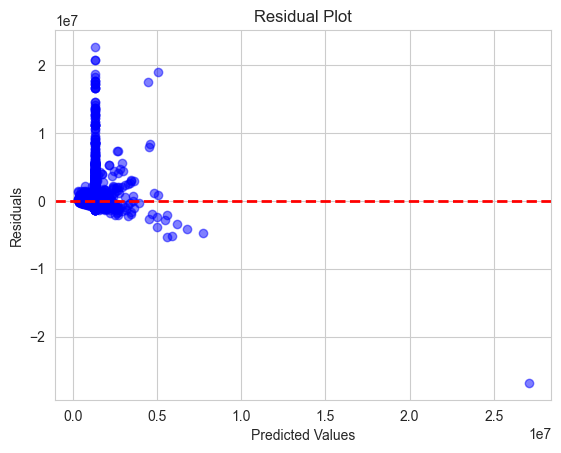

In [10]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Achsentransformation

In [55]:
y = np.sqrt(df[['price_cleaned']])
X = df[['Space extracted']]

Durchschnittlicher MAPE über K-Folds: 53.27%
Mean Coefficients: [[2.30647038]]
Mean Intercept: 675.9570674012441


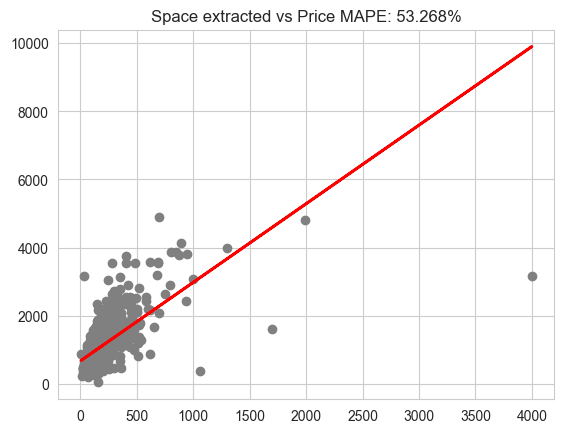

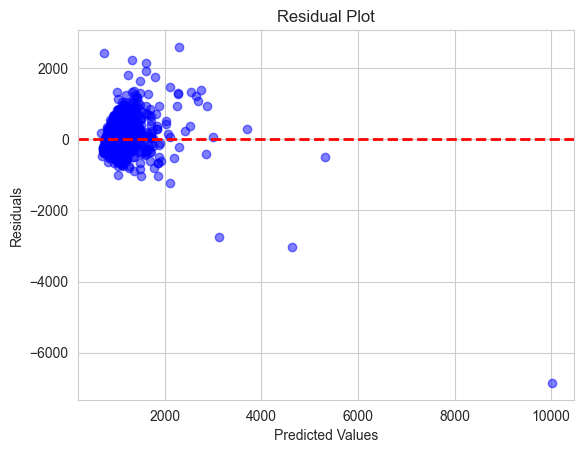

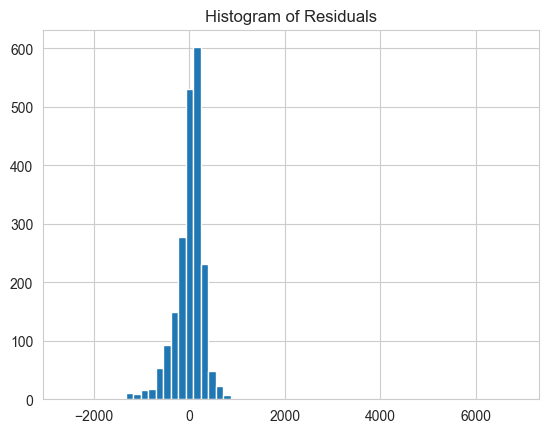

In [56]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
mapes = []
models = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mape = mean_absolute_percentage_error(y_test**2, y_pred**2)
    mapes.append(mape)
    models.append(model)

# Durchschnittlicher MAPE
average_mape = np.mean(mapes)
print(f'Durchschnittlicher MAPE über K-Folds: {average_mape:.2f}%')

print(f'Mean Coefficients: {np.mean([model.coef_ for model in models], axis=0)}')
print(f'Mean Intercept: {np.mean([model.intercept_ for model in models])}')

plot_regression_line(X_test, y_test, models, 'Space extracted vs Price')
plot_residual(y_pred, y_test)
plot_histogram_residual(y_pred, y_test)

Durchschnittlicher MAPE über K-Folds: 72.01%
Mean Coefficients: [[295621.42682207]]
Mean Intercept: -2251473.546331871


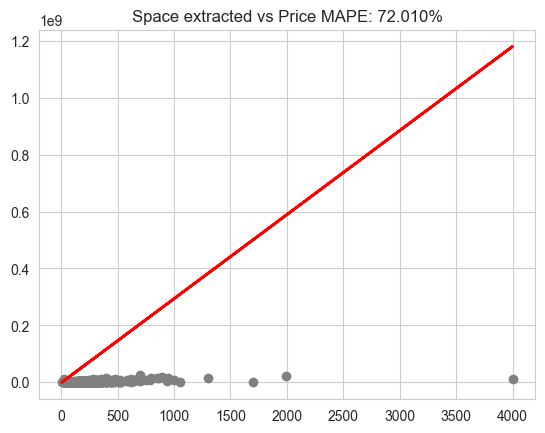

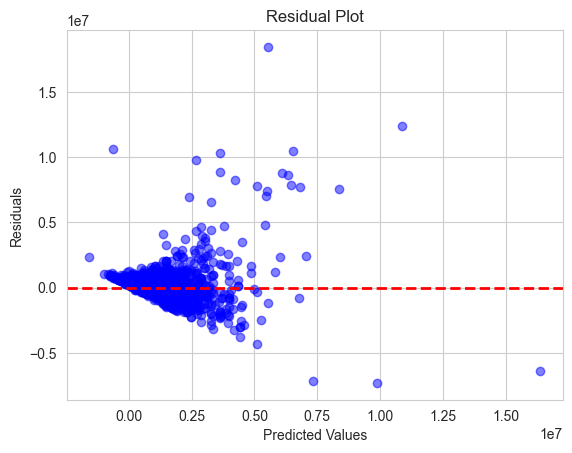

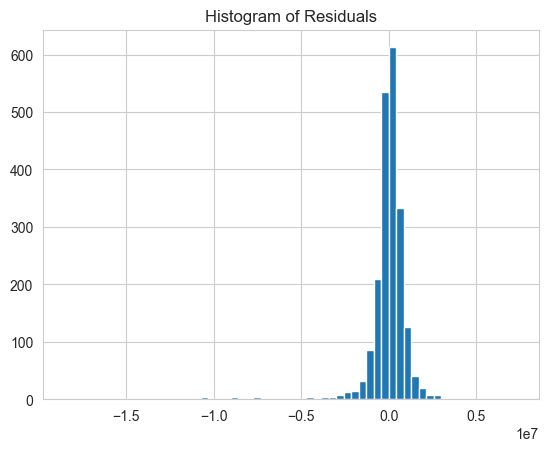

In [58]:
y = df[['price_cleaned']]
X = np.sqrt(df[['Space extracted']])

kf = KFold(n_splits=10, shuffle=True, random_state=42)
mapes = []
models = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mapes.append(mape)
    models.append(model)

# Durchschnittlicher MAPE
average_mape = np.mean(mapes)
print(f'Durchschnittlicher MAPE über K-Folds: {average_mape:.2f}%')

print(f'Mean Coefficients: {np.mean([model.coef_ for model in models], axis=0)}')
print(f'Mean Intercept: {np.mean([model.intercept_ for model in models])}')

plot_regression_line(X_test, y_test, models, 'Space extracted vs Price')
plot_residual(y_pred, y_test)
plot_histogram_residual(y_pred, y_test)